# Which product characteristics (Features) drive customer sentiment (winpercent) ?
> Key result expected: Best feature extraction

In [1]:
# Load necessary packages
from sklearn.model_selection import train_test_split # for Lasso algorithm's feature extraction
import pandas as pd # dataframe manipulation
import matplotlib.pyplot as plt # plotting graphs
import numpy as np # efficient calculation
import seaborn as sns
import statsmodels.formula.api as smf # Linear regression: In order to use "formula notation" similar to R
from sklearn.linear_model import Lasso # # Lasso regression to extract key features

## Import and check the data quality

In [2]:
# Read CSV as DataFrame df
df = pd.read_csv('candy-data.csv') # Path to the input file
# Glimpse of data
print(df.head())

  competitorname  chocolate  fruity  caramel  peanutyalmondy  nougat  \
0      100 Grand          1       0        1               0       0   
1   3 Musketeers          1       0        0               0       1   
2       One dime          0       0        0               0       0   
3    One quarter          0       0        0               0       0   
4      Air Heads          0       1        0               0       0   

   crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
0                 1     0    1         0         0.732         0.860   
1                 0     0    1         0         0.604         0.511   
2                 0     0    0         0         0.011         0.116   
3                 0     0    0         0         0.011         0.511   
4                 0     0    0         0         0.906         0.511   

   winpercent  
0   66.971725  
1   67.602936  
2   32.261086  
3   46.116505  
4   52.341465  


In [3]:
# Inspect data types
print(df.dtypes) # exlcuding competitorname, all other features are numerical

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object


In [4]:
# Check for missing values
print(df.describe()) # No missing values 
# Since all input values are between ~0 to ~1, no standardization required

       chocolate     fruity    caramel  peanutyalmondy     nougat  \
count  85.000000  85.000000  85.000000       85.000000  85.000000   
mean    0.435294   0.447059   0.164706        0.164706   0.082353   
std     0.498738   0.500140   0.373116        0.373116   0.276533   
min     0.000000   0.000000   0.000000        0.000000   0.000000   
25%     0.000000   0.000000   0.000000        0.000000   0.000000   
50%     0.000000   0.000000   0.000000        0.000000   0.000000   
75%     1.000000   1.000000   0.000000        0.000000   0.000000   
max     1.000000   1.000000   1.000000        1.000000   1.000000   

       crispedricewafer       hard        bar   pluribus  sugarpercent  \
count         85.000000  85.000000  85.000000  85.000000     85.000000   
mean           0.082353   0.176471   0.247059   0.517647      0.478647   
std            0.276533   0.383482   0.433861   0.502654      0.282778   
min            0.000000   0.000000   0.000000   0.000000      0.011000   
25%     

In [5]:
# How the composition is distributed ?
df.iloc[:,1:7].sum(axis=0,numeric_only=True) # Seems mostly candies include chocolate and fruity

chocolate           37
fruity              38
caramel             14
peanutyalmondy      14
nougat               7
crispedricewafer     7
dtype: int64

## Visual EDA for correlations

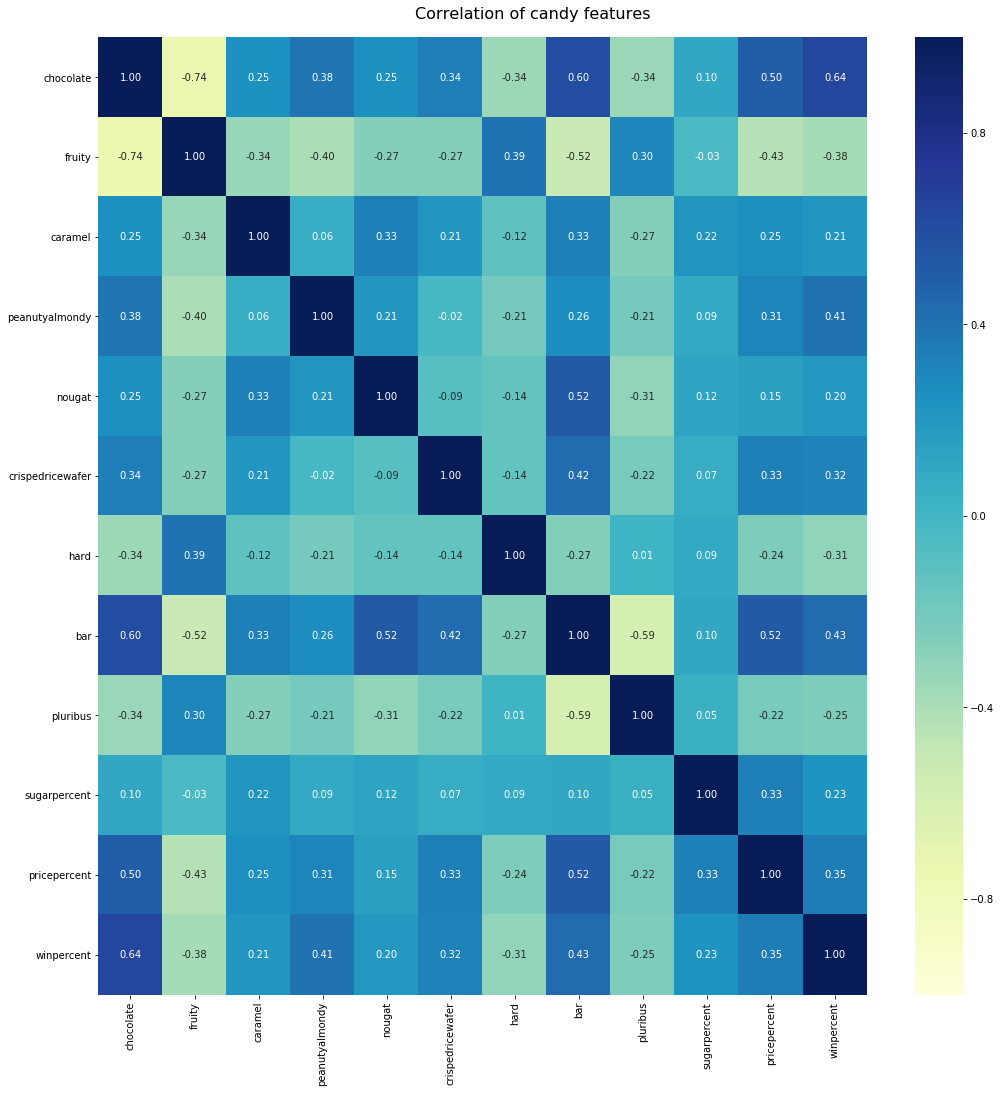

In [6]:
# Colormap to know the correlation between ingredients
plt.figure(figsize=(16,16))
plt.suptitle("Correlation of candy features", fontsize= 16)
sns.heatmap(df.corr(), annot=True, fmt="0.2f",cmap="YlGnBu", vmin=-1.0, vmax=1.0) # anchor the colormap
plt.tight_layout(pad=5.0)
plt.show()

## Interpretation:
#### Examining last row of the colormap
> 1. Chocholate having correlation factor:0.64 seems to be highly correlated with winpercent
> 2. Bar with correlation factor:0.43 is also correlated next to chocolate
> 3. Peanutyalmondy also can be influencing factor

## Let's examine these 3 ingredients in detail

In [7]:
# Since there are more than 1 time, we run this piece, let's build function
def viz_impact(df,col_x): 
    # plots violin and pie graphs for a given ingredient comparing it's impact on
    # winpercent,pricepercentile,sugarpercentile
    viz_graph = plt.figure(figsize=(20,20))
    viz_graph.suptitle("Impact by ingredient: "+ col_x,fontsize= 40)

    plt.subplot(2,2,1)
    plt.title("Influence on Winning precentage",fontsize=16)
    sns.violinplot(x= col_x, y="winpercent", data=df,color="brown")
    plt.xlabel("Does it have ? (Yes = 1, No = 0)")

    plt.subplot(2,2,2)
    plt.title("Influence on Price percentage",fontsize=16)
    sns.violinplot(x=col_x,y="pricepercent", data=df)
    plt.xlabel("Does it have ? (Yes = 1, No = 0)")

    if(col_x != "bar"): # Since bar wrapping has no influence on sugarpercentile
        plt.subplot(2,2,3)
        plt.title("Total percentage of Candies with and without this ingredient",fontsize=16)
        plt.pie(df[col_x].value_counts(), autopct='%1.1f%%',
                colors=["#EEDD82","#98FB98"],
                labels=["Without it","With it"],
                shadow=True)

    plt.subplot(2,2,4)
    plt.title("Influence on Sugar percentage",fontsize=16)
    sns.violinplot(x=col_x, y="sugarpercent", data=df)
    plt.xlabel("Does it have ? (Yes = 1, No = 0)")


    plt.show()

C:\Users\uia68633\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


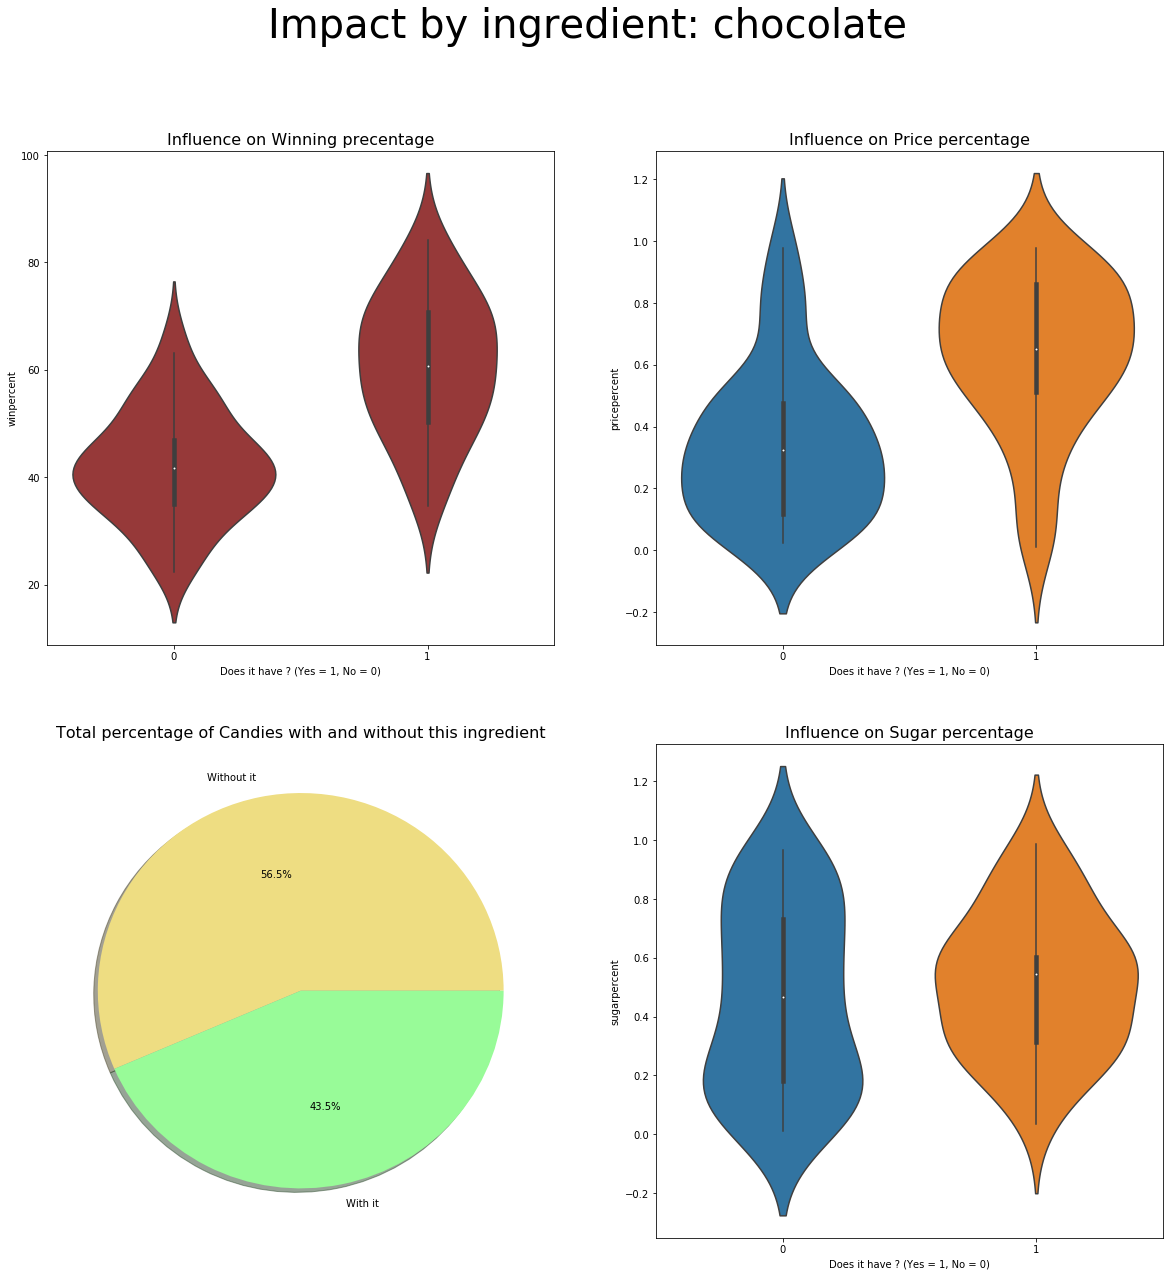

In [8]:
viz_impact(df,"chocolate")

## Interpretation
> 1. With chocolate, the winpercent shoots up.
> 2. However, with chocolate, price also raises.
> 3. Sugar composition seems to be compensated by other ingredients.
> 4. More Candies had chocolate then without it.

C:\Users\uia68633\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


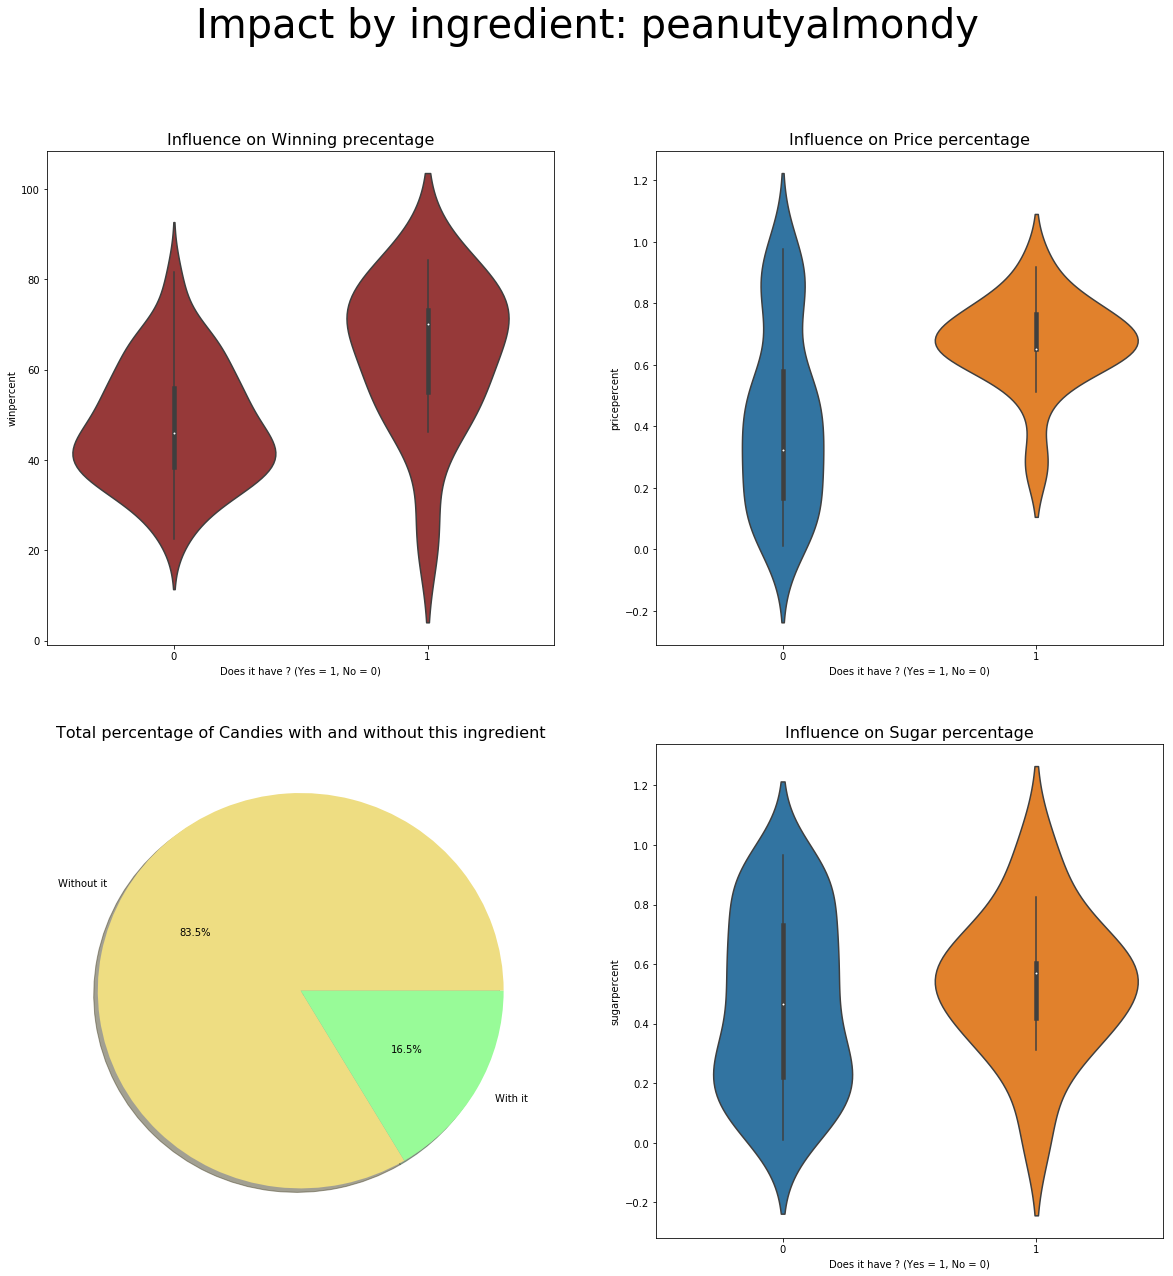

In [9]:
# Impact fro next composition
viz_impact(df,"peanutyalmondy")

## Interpretation:
> 1. With peanutyalmondy, the winpercent also shoots up.
> 2. However, peanutyalmondy is very costly.
> 3. Sugar composition seems to be moderately distributed around half the range.
> 4. Mostly, Candies are without peanutyalmondy.

C:\Users\uia68633\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


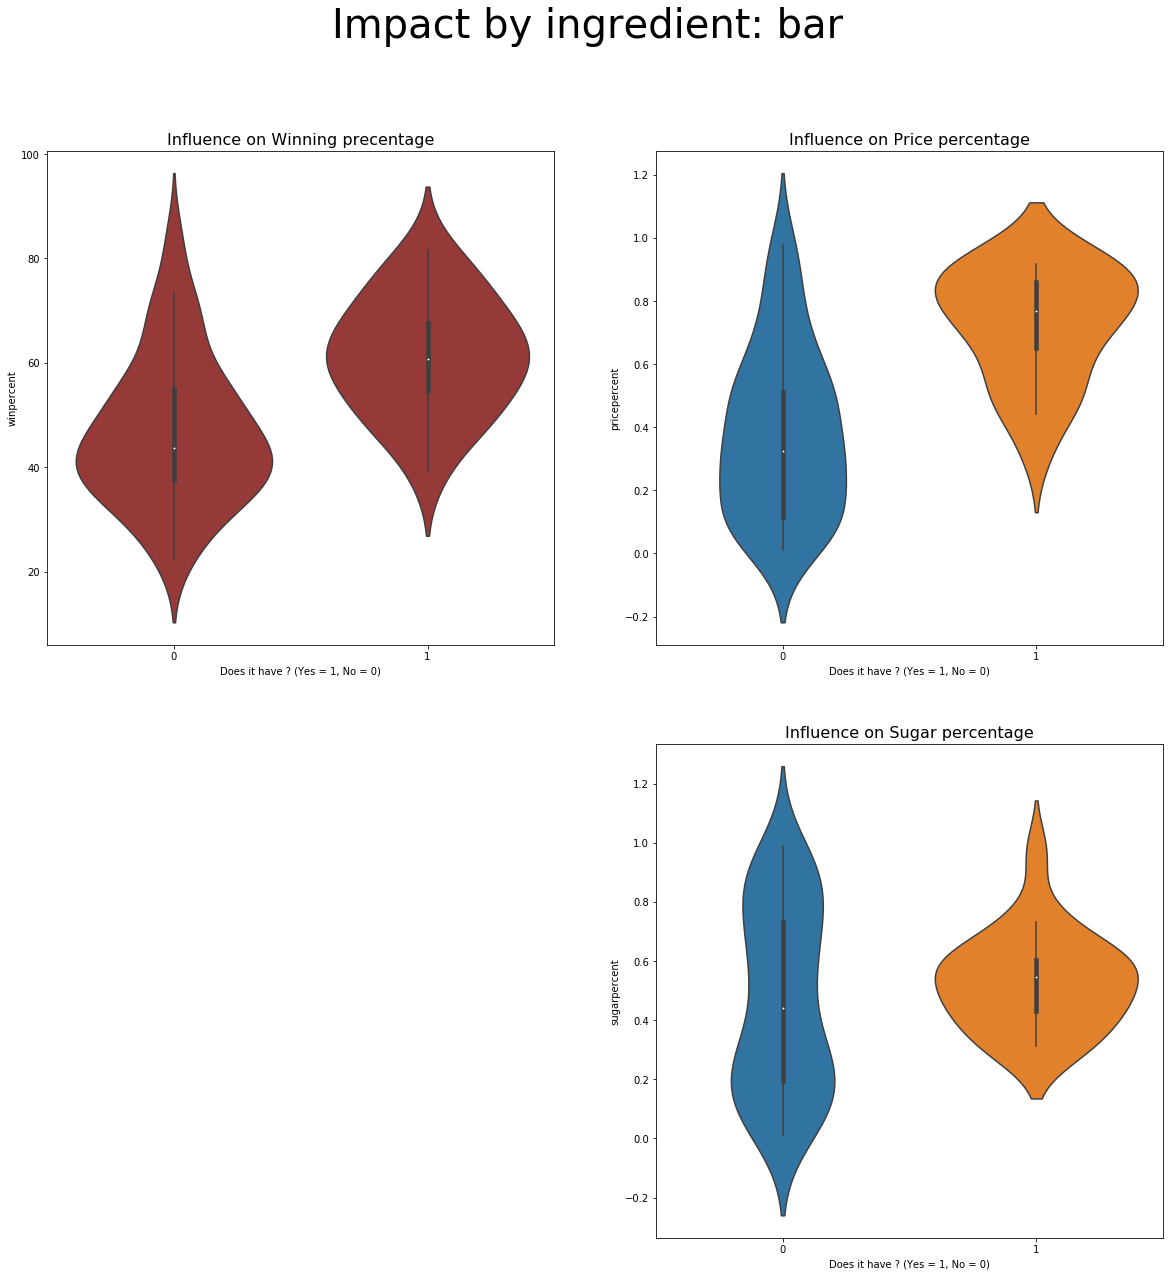

In [10]:
# Impact from bar
viz_impact(df,"bar")

## Interpretation:
> 1. With bar, winpercent seems to better (around 60%).
> 2. However, with bar, it becomes costly
> 3. Candies with and without bar have moderate distribution
> 4. Mostly, Candies are usually without bar.

## Having explored the data, in order to more concreately understand the influence of these composition, Let us apply regression methods:
* Linear regression
* Lasso regression

## Linear regression

In [11]:
formula = 'winpercent ~ chocolate + fruity + caramel + peanutyalmondy + nougat + crispedricewafer + hard + bar + pluribus + sugarpercent + pricepercent'
# create a fitted model with all three features
lm = smf.ols(formula=formula, data = df).fit()
lm.summary()#lm.params

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             winpercent   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     7.797
Date:                Sun, 17 Nov 2019   Prob (F-statistic):           9.50e-09
Time:                        15:15:02   Log-Likelihood:                -315.64
No. Observations:                  85   AIC:                             655.3
Df Residuals:                      73   BIC:                             684.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.5340      4.320      7.994      0.000      25.924      43.144
chocolate           19.7481      3.899      5.065      0.000      11.978      27.518
fruity               9.4223      3.763      2.504      0.015       1.923      16.922
caramel              2.2245      3.657      0.608      0.545      -5.065       9.514
peanutyalmondy      10.0707      3.616      2.785      0.007       2.864      17.277
nougat               0.8043      5.716      0.141      0.888     -10.588      12.197
crispedricewafer     8.9190      5.268      1.693      0.095      -1.580      19.418
hard                -6.1653      3.455     -1.784      0.079     -13.051       0.721
bar                  0.4415      5.061      0.087      0.931      -9.645      10.528
pluribus            -0.8545      3.040     -0.281      0.779      -6.913       5.204
sugarpercent         9.0868      4.659      1.950      0.055      -0.200      18.373
pricepercent        -5.9284      5.513     -1.075      0.286     -16.916       5.060
==============================================================================
Omnibus:                        1.025   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.599   Jarque-Bera (JB):                1.000
Skew:                          -0.104   Prob(JB):                        0.606
Kurtosis:                       2.511   Cond. No.                         10.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretation:
> 1. since p values for chocolate,peanutyalmondy and fruity are significant (<0.05), can reject null hypothesis for those and the rest cannot
> 2. chocolate,peanutyalmondy and fruity is highly associated with winpercent
    * If chocolate is included, on an average, winpercent increase by 19.8 factor
    * If peanutyalmondy is included, on an average, winpercent increase by 10.1 factor
    * If fruity is included, on an average, winpercent increase by 9.4 factor
    * If candy is wrapped as bar, on an average, winpercent very slightly increase by 0.44 factor
> 3. Although pricepercent is negatively correlated, since pvalue is above .05, this cant be justified statistically

## 2. Lasso regression to extract features

In [12]:
print(df.competitorname.unique().shape)
# Since the focus is on composition and competitorname is unique for each row, 
# there is no info from it therefore,it can be excluded
# Also, winpercent is the target and hence can be excluded
df_columns = df.drop(['winpercent','competitorname'], axis=1).columns

(85,)


[11.22616956 -0.          0.          0.40671136  0.          0.
 -0.          0.         -0.          0.          0.        ]


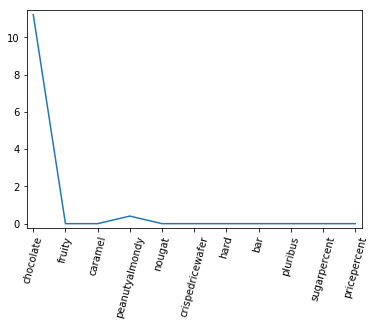

In [14]:
X = df.drop(['winpercent','competitorname'], axis=1).values
y = df.winpercent.values
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = .4, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=75)
plt.margins(0.02)
plt.show()

## Interpretation:
> 1. Most vital feature is chocolate
> 2. Next important is peanutyalmondy
> 3. Rest features seems to be insignificant as per lasso

## *Conclusion*
> 1. Key product characteristics that drive customer sentiment is Chocolate and Peanutyalmondy
> 2. New product be wrapped preferably as bar and could focus mainly on these three ingredients: 
    * Chocolate
    * Peanutyalmondy
    * Fruity